## Trabajo Práctico Número 3.

El siguiente proceso describe cómo verificar la presencia de valores nulos en el DataFrame utilizando Pandas:

1. **Alumnos**:
   - Gravi Fiorino, Mateo
   - Lo Menzo, Alejo

2. **Fecha**: 17/06/2024

3. **Profesores** : Dr. Ing. Flavio E. Spetale y Ing. Facundo Vasquez

4. **Materia**: Mineria de datos

# Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import SMOTE

# Carga de dataset

## Análisis de Datos de Calificaciones de Café

El siguiente proceso describe cómo cargar y analizar un conjunto de datos de calificaciones de café utilizando Pandas:

1. **Carga del Dataset**:
   - Se utiliza `pd.read_csv` para cargar el archivo `CoffeeRatings.csv` delimitado por punto y coma (`;`).

2. **Visualización de Datos**:
   - Muestra una parte del dataset con sus calificaciones de aroma, sabor, regusto, acidez, cuerpo, balance, uniformidad, dulzura, humedad total y color.

### Ejemplo de Datos

| Scores_Aroma | Scores_Flavor | Scores_Aftertaste | Scores_Acidity | Scores_Body | Scores_Balance | Scores_Uniformity | Scores_Sweetness | Scores_Moisture | Scores_Total | Color |
|--------------|---------------|-------------------|----------------|-------------|----------------|-------------------|------------------|-----------------|--------------|-------|
| 85           | 85            | 80                | 80             | 80          | 80             | 100               | 100              | 12              | 8692         | Green |
| 85           | 817           | 80                | 775            | 80          | 80             | 100               | 100              | 12              | 8642         | Green |

3. **Manipulación de Datos**:
   - Se eliminan las columnas no deseadas utilizando `df.drop`.

4. **Estadísticas Descriptivas**:
   - Se genera una descripción estadística de las columnas numéricas utilizando `df.describe`.

### Estadísticas Descriptivas (Numéricas)

|                  | Scores_Aroma | Scores_Flavor | Scores_Aftertaste | Scores_Acidity | Scores_Body | Scores_Balance | Scores_Uniformity | Scores_Sweetness | Scores_Moisture |
|------------------|--------------|---------------|-------------------|----------------|-------------|----------------|-------------------|------------------|-----------------|
| **count**        | 835.000000   | 835.000000    | 835.000000        | 835.000000     | 835.000000  | 835.000000     | 835.000000        | 835.000000       | 835.000000      |
| **mean**         | 623.726946   | 615.576048    | 611.677844        | 617.116168     | 610.330539  | 611.276647     | 191.758084        | 157.644311       | 8.231138        |
| **std**          | 273.720152   | 274.245606    | 263.865747        | 274.480062     | 276.366482  | 276.300203     | 257.583828        | 203.439529       | 5.130245        |
| **min**          | 0.000000     | 0.000000      | 0.000000          | 0.000000       | 0.000000    | 0.000000       | 0.000000          | 0.000000         | 0.000000        |
| **25%**          | 717.000000   | 708.000000    | 683.000000        | 717.000000     | 708.000000  | 692.000000     | 100.000000        | 100.000000       | 1.000000        |
| **50%**          | 758.000000   | 742.000000    | 733.000000        | 742.000000     | 742.000000  | 742.000000     | 100.000000        | 100.000000       | 11.000000       |
| **75%**          | 775.000000   | 767.000000    | 758.000000        | 767.000000     | 767.000000  | 767.000000     | 100.000000        | 100.000000       | 12.000000       |
| **max**          | 875.000000   | 883.000000    | 867.000000        | 875.000000     | 842.000000  | 858.000000     | 933.000000        | 933.000000       | 17.000000       |

5. **Información del DataFrame**:
   - Se obtiene una descripción general del DataFrame utilizando `df.info`.

### Información del DataFrame

| Column             | Non-Null Count | Dtype  |
|--------------------|----------------|--------|
| Scores_Aroma       | 835 non-null   | int64  |
| Scores_Flavor      | 835 non-null   | int64  |
| Scores_Aftertaste  | 835 non-null   | int64  |
| Scores_Acidity     | 835 non-null   | int64  |
| Scores_Body        | 835 non-null   | int64  |
| Scores_Balance     | 835 non-null   | int64  |
| Scores_Uniformity  | 835 non-null   | int64  |
| Scores_Sweetness   | 835 non-null   | int64  |
| Scores_Moisture    | 835 non-null   | int64  |
| Color              | 835 non-null   | object |

### Estadísticas Descriptivas (Categóricas)

| Color  | Count | Unique | Top   | Freq |
|--------|-------|--------|-------|------|
| Color  | 835   | 3      | Green | 681  |

<span style="color:blue">**Nota**:</span> Este proceso permite una comprensión detallada del dataset, incluyendo la estructura, el contenido y las estadísticas básicas.


In [3]:
df = pd.read_csv("CoffeeRatings.csv", delimiter = ';')

In [4]:
df.head(2)

,Scores_Aroma,Scores_Flavor,Scores_Aftertaste,Scores_Acidity,Scores_Body,Scores_Balance,Scores_Uniformity,Scores_Sweetness,Scores_Moisture,Scores_Total,Color
0,85,85,80,80,80,80,100,100,12,8692,Green
1,85,817,80,775,80,80,100,100,12,8642,Green


In [5]:
df.columns
#len(df.columns)

Index(['Scores_Aroma', 'Scores_Flavor', 'Scores_Aftertaste', 'Scores_Acidity',
       'Scores_Body', 'Scores_Balance', 'Scores_Uniformity',
       'Scores_Sweetness', 'Scores_Moisture', 'Scores_Total', 'Color'],
      dtype='object')

In [6]:
df = df.drop('Scores_Total', axis = 1)

In [7]:
df.describe()

,Scores_Aroma,Scores_Flavor,Scores_Aftertaste,Scores_Acidity,Scores_Body,Scores_Balance,Scores_Uniformity,Scores_Sweetness,Scores_Moisture
count,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000
mean,623.726946,615.576048,611.677844,617.116168,610.330539,611.276647,191.758084,157.644311,8.231138
std,273.720152,274.245606,263.865747,274.480062,276.366482,276.300203,257.583828,203.439529,5.130245
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,717.000000,708.000000,683.000000,717.000000,708.000000,692.000000,100.000000,100.000000,1.000000
50%,758.000000,742.000000,733.000000,742.000000,742.000000,742.000000,100.000000,100.000000,11.000000
75%,775.000000,767.000000,758.000000,767.000000,767.000000,767.000000,100.000000,100.000000,12.000000
max,875.000000,883.000000,867.000000,875.000000,842.000000,858.000000,933.000000,933.000000,17.000000


In [8]:
len(df)

835

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Scores_Aroma       835 non-null    int64 
 1   Scores_Flavor      835 non-null    int64 
 2   Scores_Aftertaste  835 non-null    int64 
 3   Scores_Acidity     835 non-null    int64 
 4   Scores_Body        835 non-null    int64 
 5   Scores_Balance     835 non-null    int64 
 6   Scores_Uniformity  835 non-null    int64 
 7   Scores_Sweetness   835 non-null    int64 
 8   Scores_Moisture    835 non-null    int64 
 9   Color              835 non-null    object
dtypes: int64(9), object(1)
memory usage: 65.4+ KB


In [10]:
df.describe(include=['O'])
# Columna categórica

,Color
count,835
unique,3
top,Green
freq,681


# Nulos

## Verificación de Valores Nulos en el Dataset

El siguiente proceso describe cómo verificar la presencia de valores nulos en el DataFrame utilizando Pandas:

1. **Verificación de Valores Nulos**:
   - Se utiliza el método `df.isnull().sum()` para contar la cantidad de valores nulos en cada columna del DataFrame.

### Resultados de la Verificación

| Column             | Null Values |
|--------------------|-------------|
| Scores_Aroma       | 0           |
| Scores_Flavor      | 0           |
| Scores_Aftertaste  | 0           |
| Scores_Acidity     | 0           |
| Scores_Body        | 0           |
| Scores_Balance     | 0           |
| Scores_Uniformity  | 0           |
| Scores_Sweetness   | 0           |
| Scores_Moisture    | 0           |
| Color              | 0           |

### Conclusión

Todas las columnas del DataFrame tienen 0 valores nulos, lo que indica que no hay datos faltantes en el conjunto de datos.

<span style="color:blue">**Nota**:</span> La ausencia de valores nulos es importante para garantizar la integridad y la calidad del análisis de datos posterior.


In [11]:
df.isnull().sum()

Scores_Aroma         0
Scores_Flavor        0
Scores_Aftertaste    0
Scores_Acidity       0
Scores_Body          0
Scores_Balance       0
Scores_Uniformity    0
Scores_Sweetness     0
Scores_Moisture      0
Color                0
dtype: int64

# Gráficos

## Sección de Gráficos

El siguiente proceso describe cómo visualizar la media de cada tipo de puntuación en el DataFrame utilizando Matplotlib:

1. **Selección de Columnas**:
   - Se seleccionan las columnas relevantes para el análisis: `Scores_Aroma`, `Scores_Flavor`, `Scores_Aftertaste`, `Scores_Acidity`, `Scores_Body`, `Scores_Balance`, `Scores_Uniformity`, `Scores_Sweetness` y `Scores_Moisture`.

2. **Visualización de la Media de Puntuaciones**:
   - Se crea una figura de tamaño 10x6.
   - Se calcula la media de cada tipo de puntuación y se elimina la columna `Scores_Moisture` para enfocarse en las puntuaciones relevantes.
   - Se utiliza un gráfico de barras (`bar plot`) para mostrar la media de cada tipo de puntuación.
   - Se añade un título al gráfico y una etiqueta en el eje y para indicar que se trata de la puntuación media.

Interpretación del Gráfico
Media de cada tipo de puntuación:
El gráfico de barras muestra la puntuación media para cada una de las características evaluadas (aroma, sabor, regusto, acidez, cuerpo, balance, uniformidad y dulzura).
Las barras permiten comparar visualmente las puntuaciones medias entre las diferentes características.
Es útil para identificar qué características tienen puntuaciones más altas o más bajas en promedio.
Ayuda a comprender las áreas fuertes y débiles en las calificaciones del café según las diferentes dimensiones evaluadas.


<span style="color:blue">Nota:</span> Este tipo de visualización es útil para resumir y comunicar rápidamente las tendencias generales en las puntuaciones de los datos de café.

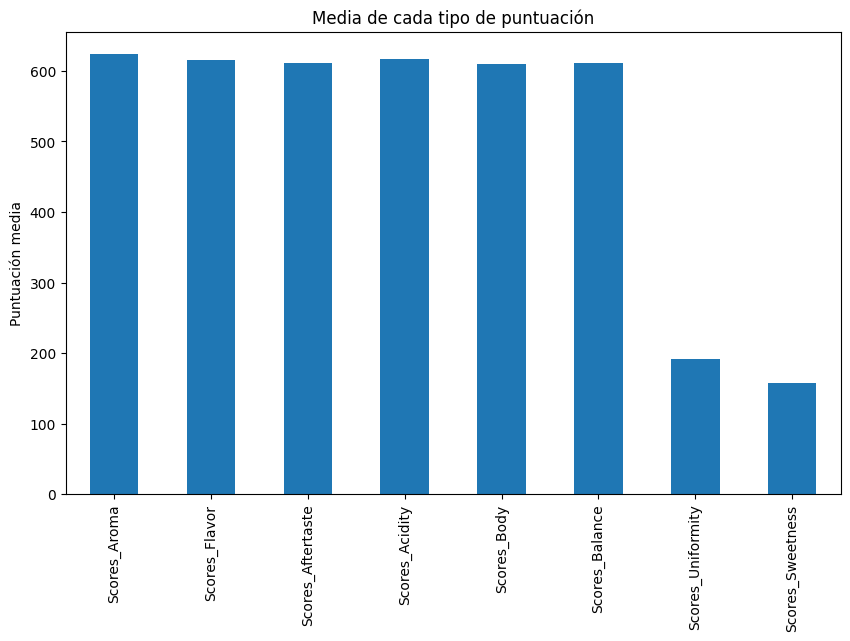

In [12]:
columns = ['Scores_Aroma','Scores_Flavor','Scores_Aftertaste','Scores_Acidity','Scores_Body','Scores_Balance','Scores_Uniformity','Scores_Sweetness','Scores_Moisture']
plt.figure(figsize=(10, 6))
df[columns].mean().drop('Scores_Moisture').plot(kind='bar')
plt.title('Media de cada tipo de puntuación')
plt.ylabel('Puntuación media')
plt.show()


## Visualización de la Distribución de las Puntuaciones

El siguiente proceso describe cómo visualizar la distribución de las puntuaciones en el DataFrame utilizando Seaborn y Matplotlib:

1. **Visualización de la Distribución de Puntuaciones**:
   - Se crea una figura de tamaño 12x6.
   - Se utiliza un gráfico de caja (`boxplot`) para mostrar la distribución de las puntuaciones, excluyendo las columnas `Scores_Moisture` y `Color`.
   - Se añade un título al gráfico y se rota las etiquetas del eje x para mejorar la legibilidad.

### Interpretación del Gráfico

- **Distribución de las Puntuaciones**:
  - El gráfico de caja muestra la distribución de las puntuaciones para cada una de las características evaluadas.
  - Cada caja representa el rango intercuartílico (IQR), con la línea dentro de la caja indicando la mediana.
  - Las "bigotes" (líneas que se extienden desde las cajas) muestran el rango de datos que no son considerados atípicos.
  - Los puntos fuera de los "bigotes" son considerados atípicos (outliers).
  - Este gráfico es útil para identificar la dispersión, simetría y presencia de outliers en las puntuaciones.
  - Ayuda a comprender la variabilidad en las calificaciones del café y detectar posibles valores extremos en las diferentes dimensiones evaluadas.

<span style="color:blue">**Nota**:</span> El gráfico de caja es una herramienta eficaz para resumir y visualizar la distribución y la variabilidad de los datos en múltiples categorías.


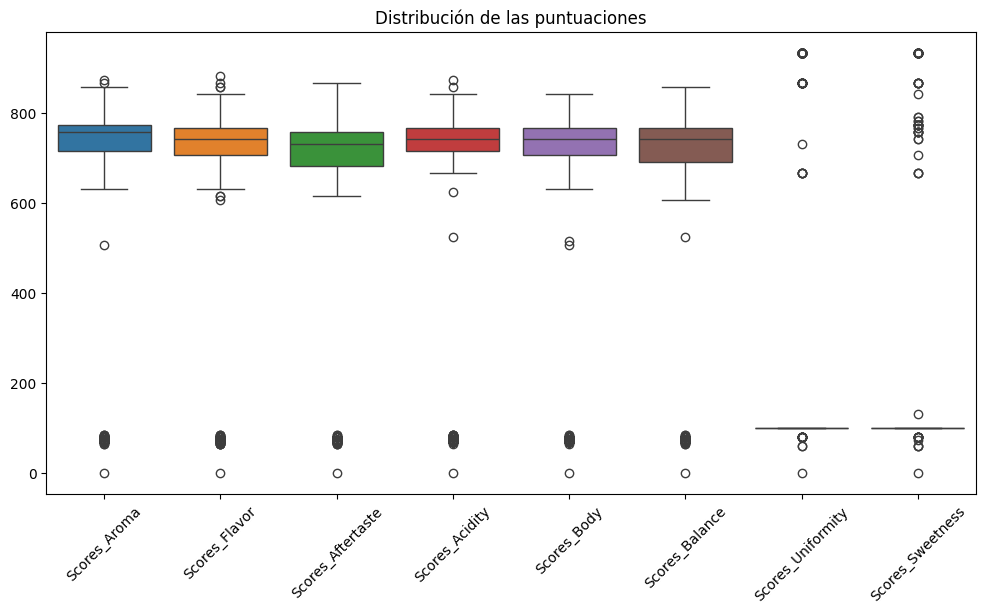

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop(columns=['Scores_Moisture', 'Color']))
plt.title('Distribución de las puntuaciones')
plt.xticks(rotation=45)
plt.show()

## Visualización de la Relación entre Aroma y Sabor

El siguiente proceso describe cómo visualizar la relación entre las puntuaciones de aroma y sabor en el DataFrame utilizando Seaborn y Matplotlib:

1. **Visualización de la Relación entre Scores_Aroma y Scores_Flavor**:
   - Se crea una figura de tamaño 8x6.
   - Se utiliza un gráfico de dispersión (`scatter plot`) para mostrar la relación entre `Scores_Aroma` y `Scores_Flavor`.
   - Se colorean los puntos según la columna `Color` para añadir una dimensión categórica adicional.
   - Se añade un título al gráfico.

### Interpretación del Gráfico

- **Relación entre Scores_Aroma y Scores_Flavor**:
  - El gráfico de dispersión muestra la relación entre las puntuaciones de aroma (eje x) y sabor (eje y) para cada muestra de café.
  - Los puntos están coloreados según la columna `Color`, lo que permite visualizar cómo las diferentes categorías de color se distribuyen en relación con las puntuaciones de aroma y sabor.
  - Este gráfico es útil para identificar patrones, tendencias y posibles correlaciones entre las puntuaciones de aroma y sabor.
  - Ayuda a observar si ciertos colores de café tienden a tener puntuaciones más altas o más bajas en aroma y sabor.

<span style="color:blue">**Nota**:</span> El gráfico de dispersión es una herramienta eficaz para explorar y visualizar las relaciones entre dos variables continuas, así como para identificar posibles agrupamientos o tendencias en los datos.


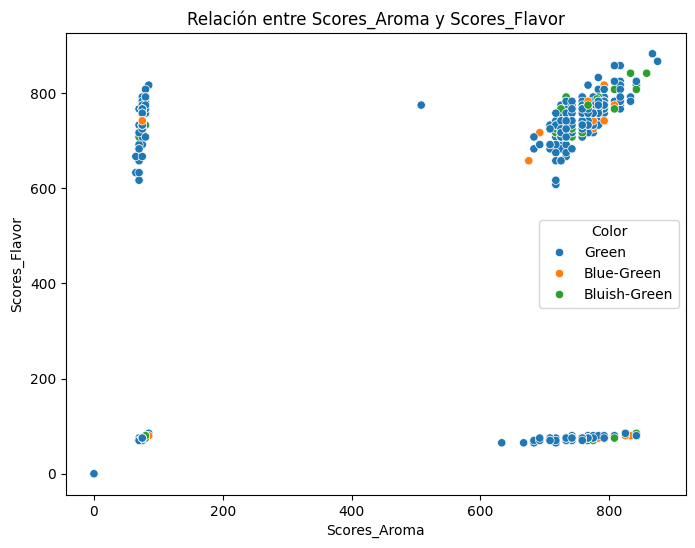

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Scores_Aroma', y='Scores_Flavor', hue='Color', data=df)
plt.title('Relación entre Scores_Aroma y Scores_Flavor')
plt.show()

## Mapa de Calor de Correlación entre las Puntuaciones

El siguiente proceso describe cómo visualizar un mapa de calor de correlación entre las puntuaciones en el DataFrame utilizando Seaborn y Matplotlib:

1. **Mapa de Calor de Correlación**:
   - Se crea una figura de tamaño 10x8.
   - Se calcula la matriz de correlación entre las puntuaciones, excluyendo la columna `Color`.
   - Se utiliza un mapa de calor (`heatmap`) para visualizar la matriz de correlación.
   - Se añaden anotaciones a las celdas del mapa de calor para mostrar los valores de correlación.
   - Se utiliza una paleta de colores `coolwarm` para resaltar las diferentes intensidades de correlación.
   - Se añade un título al mapa de calor.

### Interpretación del Mapa de Calor

- **Mapa de Calor de Correlación entre las Puntuaciones**:
  - El mapa de calor muestra la correlación entre todas las puntuaciones en el DataFrame.
  - Cada celda del mapa de calor representa el coeficiente de correlación entre dos puntuaciones.
  - Los valores de correlación varían de -1 a 1, donde:
    - Un valor cercano a 1 indica una correlación positiva fuerte.
    - Un valor cercano a -1 indica una correlación negativa fuerte.
    - Un valor cercano a 0 indica una correlación débil o inexistente.
  - Este mapa de calor es útil para identificar patrones de correlación entre las diferentes dimensiones de las puntuaciones.
  - Ayuda a comprender cómo las diferentes características están relacionadas entre sí y puede guiar el análisis exploratorio de los datos.

<span style="color:blue">**Nota**:</span> El mapa de calor de correlación es una herramienta efectiva para visualizar y comprender la relación entre múltiples variables en un conjunto de datos.


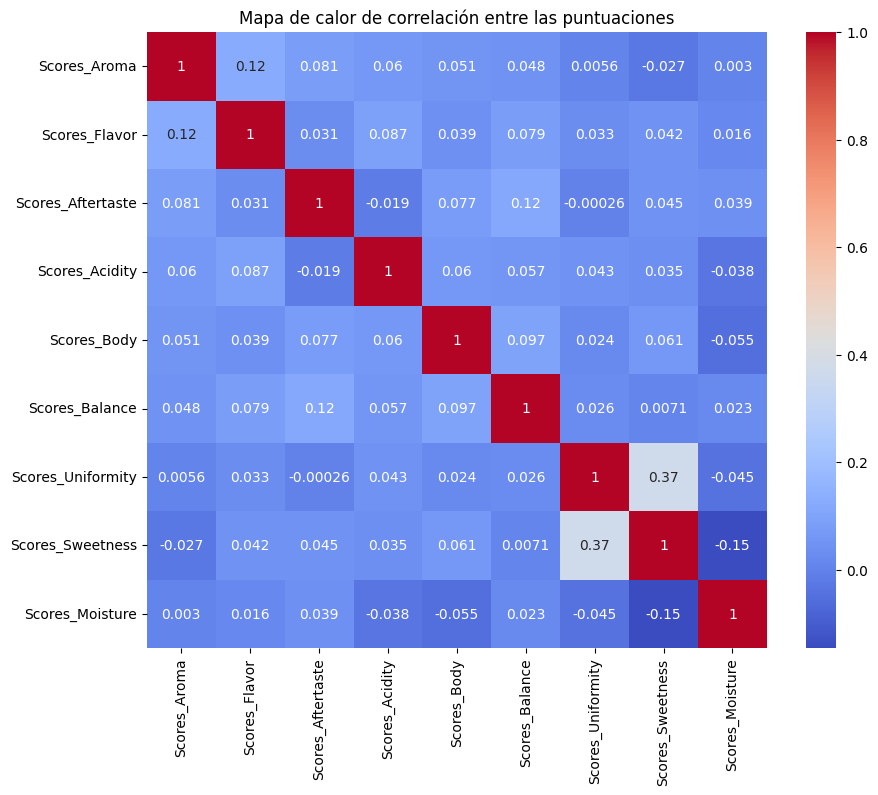

In [15]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.drop(columns=['Color']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlación entre las puntuaciones')
plt.show()


# Preparar los datos

Atipicos


## Preparación de Datos: Filtrado de Valores Atípicos


1. **Identificación de Valores Atípicos utilizando Z-score**:
   - Se calcula el Z-score para todas las variables numéricas en el DataFrame.
   - El Z-score mide cuántas desviaciones estándar se encuentra cada punto de datos de la media.
   - Se considera un valor atípico si su Z-score es mayor que 3, lo que indica que está a más de 3 desviaciones estándar de la media.
   - Esto se realiza utilizando `np.abs(stats.zscore(df.select_dtypes(include=[np.number])))`.

2. **Filtrado de Valores Atípicos**:
   - Se identifican los valores atípicos en el DataFrame utilizando la condición `(z_scores > 3).any(axis=1)`.
   - Se filtran los datos atípicos y se almacenan en `df_outliers`.
   - Se crean nuevos datos limpios (`df_clean`) excluyendo los valores atípicos utilizando `~outliers`.

### Método Correcto de Filtrado de Valores Atípicos

- **Utilización del Z-score**:
  - El Z-score es una medida estadística estándar para identificar valores atípicos en un conjunto de datos.
  - Identifica valores que están significativamente lejos de la media y es robusto a la escala de los datos.
  - Establecer un umbral Z-score de 3 es una práctica común en estadística para identificar valores atípicos graves.
  - El método del Z-score es apropiado cuando se asume que los datos siguen una distribución normal o aproximadamente normal.

- **Ventajas del Método**:
  - Proporciona una forma objetiva y cuantitativa de identificar valores atípicos.
  - Es fácil de interpretar y entender.
  - Es adecuado para datos numéricos y no paramétricos.
  - Ayuda a mejorar la calidad de los datos eliminando observaciones que pueden sesgar el análisis o los modelos de aprendizaje automático.


In [16]:
# Calcular el Z-score
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
outliers = (z_scores > 3).any(axis=1)

# Filtrar valores atípicos
df_outliers = df[outliers]
df_clean = df[~outliers]

#print("Valores atípicos:\n", df_outliers)
print("Datos sin valores atípicos:\n", df_clean)

Datos sin valores atípicos:
      Scores_Aroma  Scores_Flavor  Scores_Aftertaste  Scores_Acidity   
0              85             85                 80              80  \
1              85            817                 80             775   
2             833             80                 80              80   
3              80             80                 80             767   
4              80            792                775             775   
..            ...            ...                ...             ...   
827           733            708                692             708   
828           733            725                692             733   
830           758             70                675             692   
832             0              0                  0               0   
834            75            742                708             742   

     Scores_Body  Scores_Balance  Scores_Uniformity  Scores_Sweetness   
0             80              80             

## División de Datos en Conjuntos de Entrenamiento y Prueba

El siguiente proceso describe cómo dividir los datos en conjuntos de entrenamiento y prueba utilizando la función `train_test_split` de Scikit-Learn:

1. **Selección de Características y Etiqueta**:
   - Seleccionamos las características (`X`) y la etiqueta (`y`) del DataFrame limpio `df_clean`.
   - Las características (`X`) son todas las columnas excepto la columna `Color`.
   - La etiqueta (`y`) es la columna `Color`, que representa la categoría que estamos tratando de predecir.

2. **División en Conjuntos de Entrenamiento y Prueba**:
   - Utilizamos la función `train_test_split` para dividir el conjunto de datos en conjuntos de entrenamiento y prueba.
   - Especificamos el tamaño del conjunto de prueba (`test_size=0.3`), que indica el porcentaje de datos que se utilizarán para el conjunto de prueba. En este caso, se utiliza el 30% de los datos para pruebas.
   - También establecemos una semilla aleatoria (`random_state=42`) para garantizar que la división sea reproducible.

### Interpretación del Proceso

- **Selección de Características y Etiqueta**:
  - Es importante separar las características que se utilizarán para predecir la etiqueta de la etiqueta misma.

- **División en Conjuntos de Entrenamiento y Prueba**:
  - Dividir los datos en conjuntos de entrenamiento y prueba nos permite evaluar la capacidad de generalización de nuestro modelo.
  - El conjunto de entrenamiento se utiliza para ajustar el modelo, mientras que el conjunto de prueba se utiliza para evaluar su rendimiento en datos no vistos.
  - Es crucial utilizar un conjunto de prueba independiente para evitar el sobreajuste y garantizar una evaluación imparcial del modelo.

<span style="color:blue">**Nota**:</span> La división de datos en conjuntos de entrenamiento y prueba es un paso fundamental en el proceso de modelado predictivo, ya que nos permite entrenar y evaluar modelos de aprendizaje automático de manera adecuada.


In [17]:
# Seleccionar características y etiqueta
X = df_clean.drop('Color', axis=1)
y = df_clean['Color']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Escalado de Características

El siguiente proceso describe cómo estandarizar las características utilizando `StandardScaler` de Scikit-Learn:

1. **Estandarización de las Características**:
   - Se utiliza `StandardScaler` para transformar las características de manera que tengan una media de 0 y una desviación estándar de 1.
   - Se aplica `fit_transform` en el conjunto de entrenamiento (`X_train`) para ajustar el escalador y estandarizar las características.
   - Se aplica `transform` en el conjunto de prueba (`X_test`) utilizando los parámetros aprendidos del conjunto de entrenamiento para estandarizar las características de prueba.

In [18]:
# Estandarizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ¿Esta balanceado?

## Comprobación del Balance del Dataset

El siguiente proceso describe cómo verificar si el dataset está balanceado en términos de la distribución de las categorías utilizando la función `value_counts` de Pandas y un histograma utilizando Seaborn:

1. **Conteo de las Categorías**:
   - Se utiliza `value_counts()` en la columna `Color` del DataFrame para contar la cantidad de muestras en cada categoría.
   - Esto nos proporciona una visión general de la distribución de las categorías en el dataset.

2. **Visualización con Histograma**:
   - Se utiliza `sns.histplot` para crear un histograma de la columna `Color` del DataFrame.
   - El histograma muestra la frecuencia de cada categoría en el eje x.

### Interpretación de los Resultados

- **Conteo de las Categorías**:
  - El conteo de las categorías nos permite determinar si hay un desequilibrio en la distribución de clases en el dataset.
  - Si las categorías están desequilibradas, puede haber un sesgo en el modelo hacia las clases mayoritarias.

- **Visualización con Histograma**:
  - El histograma proporciona una representación visual de la distribución de las categorías.
  - Es útil para identificar desequilibrios significativos en la distribución de las clases.

<span style="color:blue">**Nota**:</span> Es importante verificar el balance del dataset antes de entrenar un modelo de aprendizaje automático, ya que un desequilibrio puede afectar negativamente el rendimiento del modelo y sesgar las predicciones hacia las clases mayoritarias.



In [19]:
df['Color'].value_counts()

Color
Green           681
Bluish-Green     96
Blue-Green       58
Name: count, dtype: int64

<Axes: xlabel='Color', ylabel='Count'>

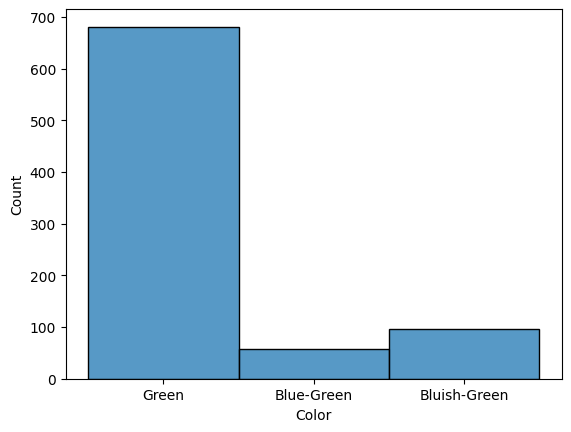

In [20]:
sns.histplot(
    df,
    x="Color"
)

# Prediccion del atributo 'Color' - SVM Kernel Lineal

## Predicción del Atributo "Color" con SVM Kernel Lineal y Validación Cruzada

El siguiente proceso describe cómo entrenar un modelo de Máquinas de Soporte Vectorial (SVM) con un kernel lineal en un dataset desbalanceado y realizar una validación cruzada para evaluar su desempeño:

1. **Entrenamiento de SVM con Kernel Lineal**:
   - Se utiliza `SVC` de Scikit-Learn con el argumento `kernel='linear'` para entrenar un clasificador SVM con un kernel lineal.
   - Se ajusta el modelo utilizando el conjunto de entrenamiento (`X_train`, `y_train`).

2. **Validación Cruzada**:
   - Se realiza una validación cruzada de 5-fold utilizando `cross_val_score` para evaluar la precisión del modelo en diferentes particiones del conjunto de entrenamiento.
   - La métrica de evaluación utilizada es la precisión (`scoring='accuracy'`).
   - Se imprime la precisión media obtenida mediante validación cruzada.

3. **Evaluación en el Conjunto de Prueba**:
   - Se realiza una predicción en el conjunto de prueba (`X_test`) utilizando el modelo entrenado.
   - Se imprime un informe de clasificación que incluye métricas como precisión, recall y F1-score para cada clase.
   - Se utiliza `zero_division=0` para evitar errores en el cálculo de métricas cuando hay clases con cero instancias en el conjunto de prueba.

### Interpretación de los Resultados

- **Validación Cruzada**:
  - La validación cruzada nos proporciona una estimación más precisa del rendimiento del modelo al evaluarlo en diferentes subconjuntos del conjunto de entrenamiento.

- **Evaluación en el Conjunto de Prueba**:
  - El informe de clasificación nos permite evaluar el rendimiento del modelo en el conjunto de prueba, proporcionando métricas detalladas para cada clase.
  - Es importante considerar métricas como precisión, recall y F1-score para comprender el rendimiento del modelo en todas las clases, especialmente en un dataset desbalanceado.



In [21]:
# Entrenar SVM con kernel lineal
svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X_train, y_train)

# Validación cruzada
scores = cross_val_score(svm_linear, X_train, y_train, cv=5, scoring='accuracy')
print(f"Precisión media (cross-validation): {scores.mean()}")

# Evaluar en el conjunto de prueba
y_pred = svm_linear.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))



Precisión media (cross-validation): 0.8266388657214346
              precision    recall  f1-score   support

  Blue-Green       0.00      0.00      0.00        18
Bluish-Green       0.00      0.00      0.00        28
       Green       0.81      1.00      0.89       190

    accuracy                           0.81       236
   macro avg       0.27      0.33      0.30       236
weighted avg       0.65      0.81      0.72       236



# Prediccion 'Color' usando SVM Kernel Gaussiano

## Predicción del Atributo "Color" con SVM Kernel Gaussiano (RBF) y Validación Cruzada

1. **Entrenamiento de SVM con Kernel Gaussiano (RBF)**:
   - Se utiliza `SVC` de Scikit-Learn con el argumento `kernel='rbf'` para entrenar un clasificador SVM con un kernel gaussiano (RBF).
   - Se ajusta el modelo utilizando el conjunto de entrenamiento (`X_train`, `y_train`).

2. **Validación Cruzada**:
   - Se realiza una validación cruzada de 5-fold utilizando `cross_val_score` para evaluar la precisión del modelo en diferentes particiones del conjunto de entrenamiento.
   - La métrica de evaluación utilizada es la precisión (`scoring='accuracy'`).
   - Se imprime la precisión media obtenida mediante validación cruzada.

3. **Evaluación en el Conjunto de Prueba**:
   - Se realiza una predicción en el conjunto de prueba (`X_test`) utilizando el modelo entrenado.
   - Se imprime un informe de clasificación que incluye métricas como precisión, recall y F1-score para cada clase.

### Interpretación de los Resultados

- **Entrenamiento de SVM con Kernel Gaussiano (RBF)**:
  - SVM con kernel gaussiano (RBF) es una opción adecuada cuando los datos no son linealmente separables, ya que puede manejar eficazmente fronteras de decisión no lineales.



In [22]:
# Entrenar SVM con kernel gaussiano (RBF)
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf.fit(X_train, y_train)

# Validación cruzada
scores = cross_val_score(svm_rbf, X_train, y_train, cv=5, scoring='accuracy')
print(f"Precisión media (cross-validation): {scores.mean()}")

# Evaluar en el conjunto de prueba
y_pred = svm_rbf.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))

Precisión media (cross-validation): 0.8266388657214346
              precision    recall  f1-score   support

  Blue-Green       0.00      0.00      0.00        18
Bluish-Green       0.00      0.00      0.00        28
       Green       0.81      1.00      0.89       190

    accuracy                           0.81       236
   macro avg       0.27      0.33      0.30       236
weighted avg       0.65      0.81      0.72       236



# Prediccion 'Color' - Random Forest

## Predicción del Atributo "Color" con Random Forest y Validación Cruzada

1. **Entrenamiento de Random Forest**:
   - Se utiliza `RandomForestClassifier` de Scikit-Learn con `n_estimators=100` para entrenar un clasificador Random Forest con 100 árboles.
   - No se limita la profundidad máxima de los árboles (`max_depth=None`).
   - Se ajusta el modelo utilizando el conjunto de entrenamiento (`X_train`, `y_train`).

2. **Validación Cruzada**:
   - Se realiza una validación cruzada de 5-fold utilizando `cross_val_score` para evaluar la precisión del modelo en diferentes particiones del conjunto de entrenamiento.
   - La métrica de evaluación utilizada es la precisión (`scoring='accuracy'`).
   - Se imprime la precisión media obtenida mediante validación cruzada.

3. **Evaluación en el Conjunto de Prueba**:
   - Se realiza una predicción en el conjunto de prueba (`X_test`) utilizando el modelo entrenado.
   - Se imprime un informe de clasificación que incluye métricas como precisión, recall y F1-score para cada clase.

### Interpretación de los Resultados

- **Entrenamiento de Random Forest**:
  - Random Forest es un método de ensamble que combina múltiples árboles de decisión para realizar predicciones.
  - Al utilizar múltiples árboles, Random Forest puede mejorar la generalización y reducir el sobreajuste.




In [23]:
# Entrenar Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf.fit(X_train, y_train)

# Validación cruzada
scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
print(f"Precisión media (cross-validation): {scores.mean()}")

# Evaluar en el conjunto de prueba
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))

Precisión media (cross-validation): 0.8138782318598834
              precision    recall  f1-score   support

  Blue-Green       0.25      0.06      0.09        18
Bluish-Green       0.25      0.04      0.06        28
       Green       0.81      0.97      0.89       190

    accuracy                           0.79       236
   macro avg       0.44      0.35      0.35       236
weighted avg       0.70      0.79      0.73       236



# Balanceo del dataset

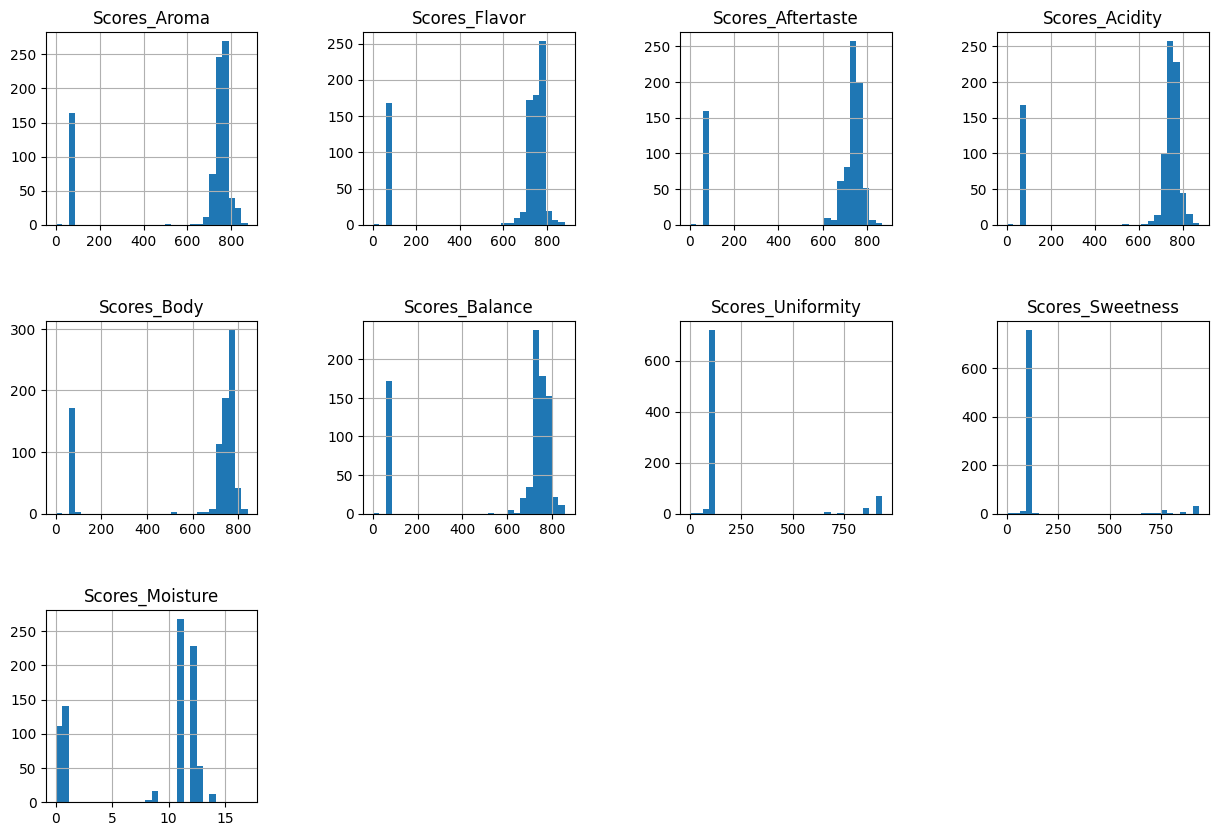

In [24]:
df.hist(bins=30, figsize=(15, 10), layout=(3, 4)) 
plt.subplots_adjust(hspace=0.5, wspace=0.5) 
plt.show()

* Visualizamos la distribucion de las variables numericas. En la misma podemos ver que las variables "Scores_Sweetness" y "Scores_Uniformity" poseen muy poca variabilidad por lo cual procederemos a chequear que tanto aportan a la hora de precedir.

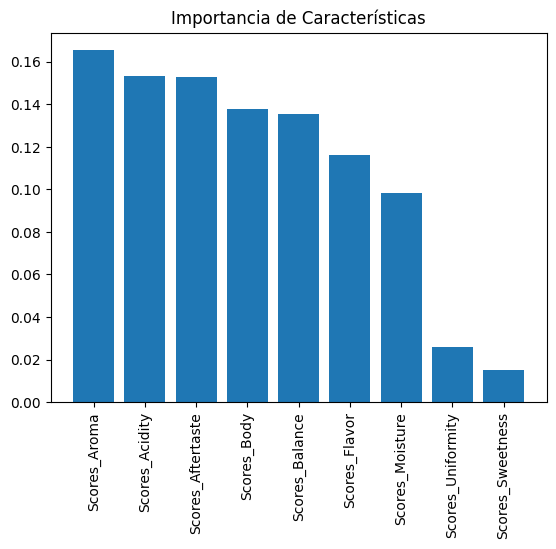

In [25]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

# Obtenemos la importancia de las características
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Visualizamos la importancia de las características
plt.figure()
plt.title('Importancia de Características')
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.show()

* Al visualizar el siguiente grafico vemos que las dos variables mencionadas anteriormente aportan menos del 3% de importancia a la hora de predecir.

* Por ultimo para tomar una decision mas segura decidimos entrenar dos modelos en los cuales a uno se le incluian todas las variables y al otro le eliminabamos las dos variables mencionadas.

In [26]:
# Identificamos índices de las características específicas
idx_sweetness = np.where(X.columns == 'Scores_Sweetness')[0][0]
idx_uniformity = np.where(X.columns == 'Scores_Uniformity')[0][0]

# Modelo con todas las características
rf_all = RandomForestClassifier(n_estimators=100)
rf_all.fit(X_train, y_train)
score_all = rf_all.score(X_test, y_test)

# Eliminamos Scores_Sweetness y Scores_Uniformity
X_train_reduced = np.delete(X_train, [idx_sweetness, idx_uniformity], axis=1)
X_test_reduced = np.delete(X_test, [idx_sweetness, idx_uniformity], axis=1)

# Modelo sin Scores_Sweetness y Scores_Uniformity
rf_reduced = RandomForestClassifier(n_estimators=100)
rf_reduced.fit(X_train_reduced, y_train)
score_reduced = rf_reduced.score(X_test_reduced, y_test)

print(f"Score con todas las características: {score_all}")
print(f"Score sin Scores_Sweetness y Scores_Uniformity: {score_reduced}")

Score con todas las características: 0.7966101694915254
Score sin Scores_Sweetness y Scores_Uniformity: 0.8050847457627118


* A partir de estos resultados decidimos eliminar estas dos variables ya que no aportaban demasiada importancia a la hora de predecir.
* Tambien procedimos a balancear la variable "Color" con la tecnica SMOTE

La técnica SMOTE (Synthetic Minority Over-sampling Technique) es específicamente una técnica de sobremuestreo. Crea ejemplos sintéticos de las clases minoritarias sin eliminar ejemplos de la clase mayoritaria.Esto aumenta el número de muestras en las clases menos representadas y ayuda a mejorar el rendimiento del modelo evitando el sesgo hacia la clase mayoritaria

In [27]:
# Seleccionamos características y etiqueta
X = df_clean.drop('Color', axis=1)
y = df_clean['Color']

X_reduced = X.drop(['Scores_Sweetness', 'Scores_Uniformity'], axis=1)

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_reduced, y)  

# Dividimos los datos balanceados en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Estandarización 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Configurar GridSearchCV para SVM Lineal
param_grid_svm_linear = {'C': [0.1, 1, 10, 100]}
svm_linear = SVC(kernel='linear')
cv = StratifiedKFold(n_splits=5)
grid_search_svm_linear = GridSearchCV(svm_linear, param_grid_svm_linear, cv=cv, scoring='accuracy')

# Resultados
grid_search_svm_linear.fit(X_train_scaled, y_train)
print(f"Mejores parámetros para SVM Lineal: {grid_search_svm_linear.best_params_}")
y_pred_svm_linear = grid_search_svm_linear.predict(X_test_scaled)
print(f"Reporte de clasificación para SVM Lineal:\n{classification_report(y_test, y_pred_svm_linear)}")

Mejores parámetros para SVM Lineal: {'C': 10}
Reporte de clasificación para SVM Lineal:
              precision    recall  f1-score   support

  Blue-Green       0.43      0.53      0.47       179
Bluish-Green       0.47      0.68      0.56       208
       Green       0.28      0.09      0.13       192

    accuracy                           0.44       579
   macro avg       0.39      0.43      0.39       579
weighted avg       0.40      0.44      0.39       579



## Resultados con SVM con Kernel Lineal

* Precisión y Recall: Este modelo muestra un rendimiento moderadamente bajo, con una precisión y un recall promedio de aproximadamente el 44% y 46% respectivamente en las tres clases. Esto indica una capacidad limitada para clasificar correctamente las clases, especialmente la clase "Green", que tiene la precisión y el recall más bajos.
* F1-Score: Los puntajes F1, que combinan precisión y recall en una sola métrica, son bajos, reflejando el equilibrio entre la precisión y el recall. La clase "Green" muestra un rendimiento particularmente pobre.
* Parámetros: El mejor parámetro 'C' encontrado es 0.1, indicando que una regularización más fuerte (menos ajuste a los datos de entrenamiento) fue preferible en este caso.

In [28]:
# Configuramos GridSearchCV para SVM Gaussiano
param_grid_svm_gaussian = {'C': [1, 10, 100], 'gamma': [0.01, 0.1, 1]}
svm_gaussian = SVC(kernel='rbf')
grid_search_svm_gaussian = GridSearchCV(svm_gaussian, param_grid_svm_gaussian, cv=cv, scoring='accuracy')

#Resultados
grid_search_svm_gaussian.fit(X_train_scaled, y_train)
print(f"Mejores parámetros para SVM Gaussiano: {grid_search_svm_gaussian.best_params_}")
y_pred_svm_gaussian = grid_search_svm_gaussian.predict(X_test_scaled)
print(f"Reporte de clasificación para SVM Gaussiano:\n{classification_report(y_test, y_pred_svm_gaussian)}")

Mejores parámetros para SVM Gaussiano: {'C': 100, 'gamma': 1}
Reporte de clasificación para SVM Gaussiano:
              precision    recall  f1-score   support

  Blue-Green       0.80      0.76      0.78       179
Bluish-Green       0.84      0.79      0.81       208
       Green       0.70      0.78      0.74       192

    accuracy                           0.78       579
   macro avg       0.78      0.77      0.78       579
weighted avg       0.78      0.78      0.78       579



## Resultados con SVM con Kernel Gaussiano

* Precisión y Recall: Este modelo muestra un rendimiento notablemente mejor que el SVM lineal, con una precisión y un recall promedio de aproximadamente el 79% y 80%. Esto indica una mejora significativa en la capacidad del modelo para clasificar correctamente las muestras en todas las clases.
* F1-Score: Los F1-scores son consistentemente altos en comparación con el modelo SVM lineal, lo que indica un mejor equilibrio entre precisión y recall. Las clases "Blue-Green" y "Bluish-Green" muestran un rendimiento particularmente fuerte.
* Parámetros: Los mejores parámetros 'C' y 'gamma' son 100 y 1 respectivamente, indicando una preferencia por una regularización menor y una influencia local más fuerte de cada vector de soporte.

In [29]:
# Configuramos GridSearchCV para Random Forest
param_grid_rf = {'n_estimators': [100, 200], 'max_depth': [10, 20, None]}
random_forest = RandomForestClassifier()
grid_search_rf = GridSearchCV(random_forest, param_grid_rf, cv=cv, scoring='accuracy')

#Resultados
grid_search_rf.fit(X_train_scaled, y_train)
print(f"Mejores parámetros para Random Forest: {grid_search_rf.best_params_}")
y_pred_rf = grid_search_rf.predict(X_test_scaled)
print(f"Reporte de clasificación para Random Forest:\n{classification_report(y_test, y_pred_rf)}")

Mejores parámetros para Random Forest: {'max_depth': None, 'n_estimators': 200}
Reporte de clasificación para Random Forest:
              precision    recall  f1-score   support

  Blue-Green       0.90      0.94      0.92       179
Bluish-Green       0.89      0.84      0.86       208
       Green       0.83      0.84      0.84       192

    accuracy                           0.87       579
   macro avg       0.87      0.87      0.87       579
weighted avg       0.87      0.87      0.87       579



## Resultado con Random Forest

* Precisión y Recall: Este modelo muestra el mejor rendimiento de los tres, con una precisión y un recall promedio cerca del 89%. Esto sugiere que el Random Forest es más capaz de manejar la variabilidad en los datos y clasificar con alta precisión.
* F1-Score: Los F1-scores son muy altos para todas las clases, especialmente para "Blue-Green". Esto refleja una muy buena eficacia en la clasificación equilibrada entre precisión y recall.
* Parámetros: Los mejores parámetros son 'max_depth' sin límite y 'n_estimators' en 100, lo que sugiere que un modelo más complejo, con más árboles y sin restricción de profundidad, fue más efectivo.


# Conclusión

SVM con Kernel Gaussiano y Random Forest son considerablemente más efectivos que el SVM con Kernel Lineal para este conjunto de datos. El Random Forest, en particular, mostró un desempeño superior en todas las métricas, haciéndolo el modelo más prometedor para seguir optimizando y usando en la clasificación de estas clases.